# Classification
The purpose of this demo is to demonstrate the ease and utility of performing classification. Although there are many classifiers (many of which are intimately related with similarly-named regressions) one of the most used and easiest to understand classifiers is **k-Nearest Neighbors**. Basically, each sample of training data is a labeled point in a high dimensional space, and when test data comes in, you simply poll the k nearest neighbors to that unlabeled point to determine which class it belongs to.

In this example, we will generate data that belongs to three different sources. We will then train the classifier using a subset of the data, and test the classifier on a separate set.
# Demo Instructions:

Perform the following steps:
<ol type = "1">
    <li>Create a function that generates features depending on a label being either 'A', 'B', or 'C'. Assume n is the (0,1) normal distribution. 
        <ol type = "a">
            <li> A: (x,y) = (1+n, 3+n) </li>
            <li> B: (x,y) = (3+n, 5+n)</li>
            <li> C: (x,y) = (5+n,1+n)</li>
        </ol>
    </li>
    <li> Generate two samples with equal numbers in each class. 
        <ol type = "a">
            <li> A training set of 30 samples </li>
            <li> A test set of 150 samples </li>
        </ol>
    </li>
    <li> Create a k-NN classifier with the following values of k: 
        <ol type = "a">
            <li> k = 1 </li>
            <li> k = 3 </li>
            <li> k = 5 </li>
        </ol>
    </li>
    <li> Create a scatter plot showing the training data with the labels as different colors and include a legend. </li>
    <li> Apply each of the 3 classifiers to predict the class in the test set. Find the overall accuracy, average recall, and average precision. Also, create the confusion matrix showing the mistakes. </li>
</ol>
# Solutions:
## 1. Create a function that generates features depending on a label being either ‘A’, ‘B’, or ‘C’. Assume n is the (0,1) normal distribution. 

In [2]:
import numpy as np
import math
import pandas as pd
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, average_precision_score, confusion_matrix, precision_score
from matplotlib.pyplot import *

%matplotlib inline
#Create a function that generates features depending on a label 
#being either 'A", 'B', or 'C'
def label_features(label):
    if (label == 'A'):
        x = 1 + np.random.normal(0,1,1)
        y = 3 + np.random.normal(0,1,1)
    if (label == 'B'):
        x = 3 + np.random.normal(0,1,1)
        y = 5 + np.random.normal(0,1,1)
    if (label == 'C'):
        x = 5 + np.random.normal(0,1,1)
        y = 1 + np.random.normal(0,1,1)
    return x,y

##  2. Generate two samples with equal numbers in each class.
### 2.A. A training set of 30 samples

In [3]:
#Create array with labels ‘a’,’b’,and ‘c’
letters = []
for count in range(10):
    letters.append('A')
for count in range(10):
    letters.append('B')
for count in range(10):
    letters.append('C')
letters_A = np.array(letters)
print('Labels for Data Points')
print(letters_A)

#Create data points for training set
trainingSet = []
for count in range(10):
    trainingSet.append(label_features('A'))
for count in range(10):
    trainingSet.append(label_features('B'))
for count in range(10):
    trainingSet.append(label_features('C'))
    
#X-values from training set
x_training = [x for x, y in trainingSet]
#Converting the x-training list into a 1D array
x_trainingA = np.array(x_training)

#Y values from training set
y_training = [y for x, y in trainingSet]
#Converting the y-training list into a 1D array
y_trainingA = np.array(y_training)
    
#Creates array with x and y training values
xy_trainingA = np.concatenate((x_trainingA,y_trainingA),1)
print()
print('X & Y Values in the Training Set')
print(xy_trainingA)

Labels for Data Points
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C']

X & Y Values in the Training Set
[[-0.09236008  4.37257526]
 [-0.07481103  3.40421662]
 [ 2.0902226   3.66254135]
 [ 0.93290116  3.39658834]
 [-0.68026415  3.18470224]
 [ 0.76329914  2.82385471]
 [ 1.45711013  3.04409373]
 [ 1.00447489  0.49175242]
 [ 0.78622752  4.88653281]
 [ 2.16842909  3.04946503]
 [ 1.79816483  6.31194519]
 [ 2.61746871  3.97727186]
 [ 3.36625878  6.43813872]
 [ 1.23467725  4.11282336]
 [ 3.5286053   3.50937071]
 [ 2.44719551  6.09920241]
 [ 1.99384351  5.15289571]
 [ 3.97582114  4.87297197]
 [ 2.60088049  4.3634103 ]
 [ 3.17548641  6.16574424]
 [ 5.12223713  0.0450286 ]
 [ 3.18691522  1.31110829]
 [ 4.26031829  0.55682468]
 [ 4.97055198  1.75596136]
 [ 4.60066943  2.06750539]
 [ 5.01563475  1.3343365 ]
 [ 5.40179367  1.1743232 ]
 [ 4.74082952  2.74935448]
 [ 4.08976589  0.67572683]
 [ 4.68204097  0.40623694]]


### 2.B. A test set of 150 samples

In [4]:
test_targets = []
for count in range(50):
    test_targets.append('A')
for count in range(50):
    test_targets.append('B')
for count in range(50):
    test_targets.append('C')

testSet = []
for letter in test_targets:
    testSet.append(label_features('A'))
    
#X-values from test set
x_test = [x for x, y in testSet]
#Converting the x-training list into a 1D array
x_testA = np.array(x_test)

#Y values from training set
y_test = [y for x, y in testSet]
#Converting the y-training list into a 1D array
y_testA = np.array(y_test)
    
#Creates array with x and y training values
xy_testA = np.concatenate((x_testA,y_testA),1)

#turning the targets into an array
test_targets = np.array(test_targets)

## 3. Create a k-NN classifier with the following values of k. 
### 3.A. k=1

In [14]:
from sklearn import neighbors

#k-NN classifier for k=1
#By using ‘distance’, closer neighbors will have greater weight #than further ones
k1 = neighbors.KNeighborsClassifier(1,weights='distance')
k1.fit(xy_trainingA,letters_A)
# apply the model to the test data
k1_pred = k1.predict(xy_testA)
print(k1_pred)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'B' 'A' 'A'
 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A'
 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A'
 'A' 'A' 'B' 'A' 'B' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'B' 'A' 'C' 'A'
 'A' 'A' 'B' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'B' 'A' 'A'
 'A' 'C' 'A' 'C' 'A' 'A' 'A' 'A' 'A' 'A' 'C' 'A' 'A' 'A' 'A' 'B' 'A' 'A'
 'A' 'A' 'B' 'A' 'A' 'A']


### 3.B. k=3

In [7]:
#k-NN classifier for k=3
k3 = neighbors.KNeighborsClassifier(3,weights='distance')
# apply the model to the test data
k3.fit(xy_trainingA,letters_A)
k3_pred = k3.predict(xy_testA)
print(k3_pred)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B'
 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'B' 'A' 'A' 'A'
 'A' 'A' 'B' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'B' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'C' 'A' 'A' 'A' 'A' 'B' 'A' 'A'
 'A' 'A' 'B' 'A' 'A' 'A']


### 3.C. k=9

In [8]:
#k-NN classifier for k=9
k9 = neighbors.KNeighborsClassifier(9,weights='distance')
k9.fit(xy_trainingA,letters_A)
# apply the model to the test data
k9_pred = k9.predict(xy_testA)
print(k9_pred)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'A' 'A' 'A'
 'A' 'A' 'B' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'A' 'A'
 'A' 'A' 'A' 'C' 'A' 'A' 'A' 'A' 'A' 'A' 'C' 'A' 'A' 'A' 'A' 'B' 'A' 'A'
 'A' 'A' 'B' 'A' 'B' 'A']


## 4. Create a scatter plot showing the training data with the labels as different colors and include a legend.

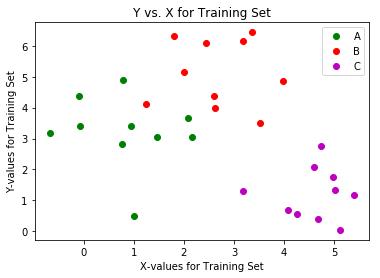

In [9]:
#Plotting the training data
%matplotlib inline
#Plots the first set of 10 values in the training set-- 'A' values
plot(x_trainingA[0:10],y_trainingA[0:10],'go',label='A')
#Plots the second set of 10 values in the training set -- 'B' values
plot(x_trainingA[10:20],y_trainingA[10:20],'ro',label='B')
#Plots the third set of 10 values in the training set-- 'C' values
plot(x_trainingA[20:30],y_trainingA[20:30],'mo',label='C')
xlabel('X-values for Training Set')
ylabel('Y-values for Training Set')
title('Y vs. X for Training Set')
legend(loc='best')
show()

## 5. Apply each of the 3 classifiers to predict the class in the test set. Find the overall accuracy, average recall, and average precision. Also, create the confusion matrix showing the mistakes (The expectation is that k=3 will perform best, but this is not guaranteed). 
### 5.A. Overall Accuracy

In [10]:
#Finding the overall accuracy for each k-value

#k=1
#Returns the percentage of correctly classified samples
accuracy_k1 = accuracy_score(test_targets,k1_pred)
print('Accuracy for k=1')
print(accuracy_k1*100)

#k=3
lettersTest_A = k3.predict(xy_testA)
#Returns the percentage of correctly classified samples
accuracy_k3 = accuracy_score(test_targets,k3_pred)
print('Accuracy for k=3')
print(accuracy_k3*100)

#k=9
lettersTest_A = k9.predict(xy_testA)
#Returns the percentage of correctly classified samples
accuracy_k9 = accuracy_score(test_targets,k9_pred)
print('Accuracy for k=9')
print(accuracy_k9*100)

Accuracy for k=1
37.333333333333336
Accuracy for k=3
35.333333333333336
Accuracy for k=9
36.0


### 5.B. Average Recall

In [11]:
#Calculating the average recall-- ability of the classifier to find all the positive samples

#Average recall for k=1
recall_k1 = recall_score(test_targets,k1_pred,average='macro')
print('Average recall for k=1')
print(recall_k1)

#Average recall for k=3
recall_k3 = recall_score(test_targets,k3_pred,average='macro')
print('Average recall for k=3')
print(recall_k3)

#Average recall for k=9
recall_k9 = recall_score(test_targets,k9_pred,average='macro')
print('Average recall for k=9')
print(recall_k9)

Average recall for k=1
0.37333333333333335
Average recall for k=3
0.35333333333333333
Average recall for k=9
0.36000000000000004


### 5.C. Average Precision

In [12]:
#Calculating the average precision

#Average precision for k=1
precision_k1 = precision_score(test_targets, k9_pred, average ='macro')
print('Average precision for k=1')
print(precision_k1)

#Average precision for k=3
precision_k3 = precision_score(test_targets, k9_pred, average='macro')
print('Average precision for k=3')
print(precision_k3)

#Average precision for k=9
precision_k9 = precision_score(test_targets, k9_pred, average = 'macro')
print('Average precision for k=9')
print(precision_k9)

Average precision for k=1
0.570947570947571
Average precision for k=3
0.570947570947571
Average precision for k=9
0.570947570947571


### 5.D. Confusion Matrix

The following link explains how confusion matrices work; it also shows how to create one in Python and R: https://machinelearningmastery.com/confusion-matrix-machine-learning/. 

In [13]:
#Creating the confusion matrix
#Confusion matrix for k1-classifier
confusion_matrix1 = confusion_matrix(test_targets, k1_pred ,labels=['A','B',"C"])
print('Confusion matrix for k1-classifier')
print(confusion_matrix1)

#Confusion matrix for k3-classifier
confusion_matrix3 = confusion_matrix(test_targets, k3_pred, labels=['A','B',"C"])
print('Confusion matrix for k3-classifier')
print(confusion_matrix3)

#Confusion matrix for k-9 classifier
confusion_matrix9 = confusion_matrix(test_targets, k9_pred, labels=['A','B',"C"])
print('Confusion matrix for k9-classifier')
print(confusion_matrix9)

Confusion matrix for k1-classifier
[[42  8  0]
 [40 10  0]
 [37  9  4]]
Confusion matrix for k3-classifier
[[41  9  0]
 [39 11  0]
 [40  9  1]]
Confusion matrix for k9-classifier
[[44  6  0]
 [42  8  0]
 [40  8  2]]
